제곱오차 구현

In [ ]:
import numpy as np

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
def sum_squares_error(y,t):
  return 0.5 * np.sum((y-t)**2)

In [ ]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.2725

binary cross entropy 구현

In [ ]:
def cross_entropy(Y,P):
  Y = np.array(Y)
  P = np.array(P)

  return -np.sum(Y * np.log(P) + (1-Y) * np.log(1-P))

In [ ]:
#P는 blue, red일 확률
P = [[0.6, 0.2, 0.9, 0.3], [0.7, 0.9, 0.2, 0.4]]
#Y는 라벨
Y = [[1., 1., 0., 0.], [1., 1., 0., 0.]]

for p,y in zip(P,Y):
  print(cross_entropy(y,p))

#첫번째가 교차 엔트로피 값 더 큼 = 분류 잘못된 것

4.779523573132869
1.1960046346767592


multiple cross entropy 구현

In [ ]:
def cross_entropy_error(y,t):
  #if y가 0이면 무한대 -> 방지하기 위해 아주 작은 수 delta를 더해줌
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [ ]:
#예측값 - 합치면 1
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
#multiple classification의 label ex.MNIST
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
#y값 바꿔보기
y = [0.1, 0.05, 0.4, 0.0, 0.05, 0.1, 0.0, 0.3, 0.0, 0.0]
#multiple classification의 label ex.MNIST
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

cross_entropy_error(np.array(y), np.array(t))
#교차 엔트로피 값이 앞에 비해 크게 증가 = 잘못 분류된 것

0.9162904818741863

미니 배치 적용한 교차 엔트로피

In [ ]:
def cross_entropy_error(y,t):
  #y가 1차원이라 샘플이 하나로만 들어오는 경우 - 배치 나눌 수 없어서 차원 바꿔주는 것
  #그대로 들어가면 batch size가 10이 됨 - 속도, 메모리 향상 위해 batch size를 1로 만들어줌
  #현재 주어진 y는 결과값 10개, 샘플 1

  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size) #원래 y.size는 (10,) -> shape 통과시키면 (1,10)

  batch_size = y.shape[0]
  #batch_size는 sample의 개수만큼 나눠줘야 하는 것
  
  delta = 1e-7
  return -np.sum(t * np.log(y + delta)) / batch_size
  #각각에 대한 확률값 구하기 위해 batch_size로 나눠줘야 함

미분

In [ ]:
#2차함수 예시
def func_1(x):
  return 0.01*x**2 + 0.1*x

In [ ]:
#x 미분값 구하기
def numerical_diff(f,x):
  h = 1e-4 #0.0001
  return (f(x+h) - f(x)) / h

In [ ]:
numerical_diff(func_1, 5)

0.20000099999917254

In [ ]:
#위보다 좀더 정확한 방법
def numerical_diff(f,x):
  h = 1e-4 #0.0001
  return (f(x+h) - f(x-h)) / (2 * h)

In [ ]:
numerical_diff(func_1, 5)

0.1999999999990898

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#접선 1차함수 정의 -> f(x) = ax + b
def tangent_line(f,x):
  d = numerical_diff(f,x)
  y = f(x) -d*x #y절편
  return lambda t: d*t + y #기울기 함수 f(x) = dx + y
  #책에서는 x를 t로 정의

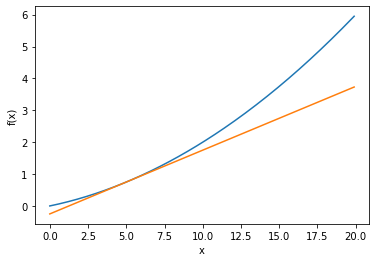

In [ ]:
#func_1 함수 그래프 그리기
x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)

#x=5일 때 접선의 기울기
tf = tangent_line(func_1, 5)
y2 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y) #func_1의 2차함수
plt.plot(x,y2) #5에서의 접선
plt.show()
#미분함으로써 접선의 기울기 구할 수 있음

기울기와 경사 하강법

In [ ]:
#x변수 2개 = 변수 여러개일때의 미분 => '편미분'
#원의 방정식
def func_2(x):
  return x[0]**2 + x[1]**2

In [ ]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)
  #변수의 개수만큼 기울기 구해야 함! =>x 두개이므로 기울기 두개
  #np.zeros_like : 어떤 변수만큼의 사이즈인 0으로 가득찬 array 배출; 즉 x의 사이즈가 2이므로 [0,0]인 numpy array 배출
  
  #기울기 여러개 동시에 계산 불가하므로 x[0], x[1] 따로 하나씩 미분
  for idx in range(x.size):
    tmp_val = x[idx] #x값

    #f(x+h)
    x[idx] = float(tmp_val) + h #x변경(h만큼 크게)
    fxh1 = f(x) #f(x) = func_2
    #fxh1 = f(x0+h, x1) = (x0+h)^2 + x1^2

    #f(x-h)
    x[idx] = float(tmp_val) - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2 * h) #기울기
    x[idx] = tmp_val #원래 x값으로 원상복귀

  return grad

In [ ]:
#w0, w1에 대한 미분값
numerical_gradient(func_2, np.array([3.0, 4.0]))

array([6., 8.])

In [ ]:
#경사하강법 - 고차원방정식 풀기 위해
#한번에 optima 찾을 수 없으므로 lr 작게 줘서 점점 가중치를 오류 작아지는 방향으로 옮김
def gradient_descent(f, init_x, lr=0.01,  step_num=100):
  x = init_x #이게 원래 알고 있던 w이고, x역할 하는건 t
  x_history = []

  for i in range(step_num):
    x_history.append(x.copy()) #가중치x가 어떻게 변화되는지 보여줌

    grad = numerical_gradient(f,x)
    x -= lr * grad #x값 업데이트(100번): 기존 값-학습률*편미분한 값

  return x, np.array(x_history)

In [ ]:
init_x = np.array([-3.0, 4.0]) #초기 w값(weight)

lr = 0.1
step_num = 100
x, x_history = gradient_descent(func_2,init_x, lr=lr, step_num=step_num)


In [ ]:
x

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
x_history

단층 신경망 클래스 구현

In [ ]:
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = sum(exp_x)
  y = exp_x / sum_exp_x
  
  return y

In [ ]:
#샘플 1개인 경우의 편미분
def _numerical_gradient_no_batch(f,w): #여기서 x는 가중치!
  h = 1e-4
  grad = np.zeros_like(w)
  
  for idx in range(w.size):
    tmp_val = w[idx] #n번째 가중치

    #f(w+h)
    w[idx] = float(tmp_val) + h
    fxh1 = f(w)

    #f(w-h)
    w[idx] = float(tmp_val) - h
    fxh2 = f(w)

    grad[idx] = (fxh1 - fxh2) / (2 * h)
    w[idx] = tmp_val

  return grad

In [ ]:
def numerical_gradient(f,W): #여기서 X는 가중치(weight)!
  #샘플 1개인 경우는 그냥 호출
  if W.ndim == 1:
    return _numerical_gradient_no_batch(f,W)
  
  #샘플 여러개 한꺼번에 들어온 경우: batch_size = 2
  else:
    grad = np.zeros_like(W)
    
    for idx, W in enumerate(W):
      grad[idx] = _numerical_gradient_no_batch(f,W)

    return grad

In [ ]:
#신경망 만들기
class SimpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) #초기화

  def predict(self, x):
    return np.dot(x, self.W)

  #loss 함수
  def loss(self, x, t): #t는 label
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t) #교차엔트로피 에러값

    return loss #y와 t의 교차 엔트로피값

In [ ]:
net = SimpleNet() #객체화
net.W

array([[ 0.33674988,  0.48966132,  0.52179073],
       [-1.11784559, -1.39744402, -0.15255182]])

In [ ]:
#임의의 초기값 입력
x = np.array([0.6, 0.9])

In [ ]:
#실제로 예측한 값
p = net.predict(x)
p

array([-0.8040111 , -0.96390283,  0.1757778 ])

In [ ]:
np.argmax(p) #가장 큰 값의 index 반환

2

In [ ]:
t = np.array([0, 0, 1])
net.loss(x, t) #cross entropy 값

0.5278663378477122

In [ ]:
#더미 파라미터
def f(d):
  return net.loss(x, t)

dw = numerical_gradient(f, net.W) #목적함수에 대해 미분한 값
dw

array([[ 0.13285709,  0.11322561, -0.2460827 ],
       [ 0.19928564,  0.16983841, -0.36912405]])

In [ ]:
dw = numerical_gradient(lambda w : net.loss(x, t), net.W)
dw

array([[ 0.13285709,  0.11322561, -0.2460827 ],
       [ 0.19928564,  0.16983841, -0.36912405]])

In [ ]:
#새로운 w 업데이트
net.W = net.W - 0.001 * dw

In [ ]:
net.W -= 0.001 * dw

In [ ]:
p = net.predict(x)
p

array([-0.80452924, -0.96434441,  0.17673752])

In [ ]:
np.argmax(p)

2

In [ ]:
#업데이트되며 loss(cross entropy 값) 작아짐
net.loss(x,t)

0.5272749095507626

In [ ]:
#반복할수록 loss 감소
for i in range(10):
  dw = numerical_gradient(lambda w : net.loss(x, t), net.W)
  net.W -= 0.001 * dw
  loss = net.loss(x,t)
  print(loss)

0.5269796360861035
0.5266846140398473
0.5263898431647127
0.5260953232136423
0.5258010539398008
0.5255070350965771
0.5252132664375821
0.5249197477166485
0.5246264786878337
0.5243334591054155
